# Uploading Training Data

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [43]:
path = 'data'
dataset_path = os.listdir( path)

label_types = os.listdir( path)
print (label_types)

['bensh-press', 'bicep-curls', 'cable-flies', 'dips', 'handstand-push-ups', 'lat-pulldown', 'Lateral-raise', 'leg-press', 'pull-ups', 'push-ups', 'sit-ups', 'squats']


In [44]:
rooms = []

for item in dataset_path:
 # Get all the file names
 all_rooms = os.listdir( path + '/' +item)

 # Add them to the list
 for room in all_rooms:
    rooms.append((item, str( path + '/' +item) + '/' + room))

# Build a dataframe
data = pd.DataFrame( data=rooms, columns=['tag', 'video_name'])
print(data.head())
print(data.tail())

           tag                                         video_name
0  bensh-press  C:/Users/aminb/Desktop/EID2/Image Mining/fitne...
1  bensh-press  C:/Users/aminb/Desktop/EID2/Image Mining/fitne...
2  bensh-press  C:/Users/aminb/Desktop/EID2/Image Mining/fitne...
3  bensh-press  C:/Users/aminb/Desktop/EID2/Image Mining/fitne...
4  bensh-press  C:/Users/aminb/Desktop/EID2/Image Mining/fitne...
        tag                                         video_name
929  squats  C:/Users/aminb/Desktop/EID2/Image Mining/fitne...
930  squats  C:/Users/aminb/Desktop/EID2/Image Mining/fitne...
931  squats  C:/Users/aminb/Desktop/EID2/Image Mining/fitne...
932  squats  C:/Users/aminb/Desktop/EID2/Image Mining/fitne...
933  squats  C:/Users/aminb/Desktop/EID2/Image Mining/fitne...


# Data Visualisation

In [45]:
data = data.sample(frac=1)

<Axes: xlabel='tag', ylabel='count'>

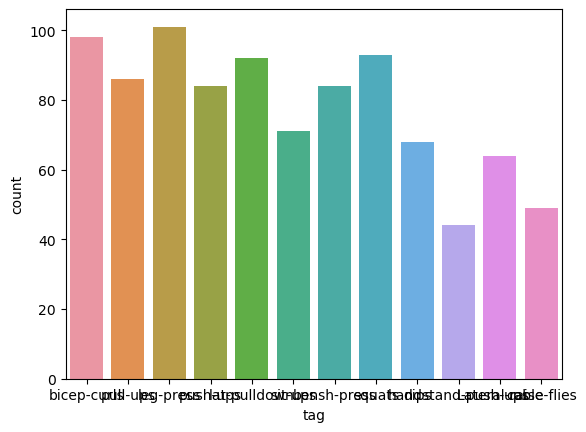

In [46]:
import seaborn as sns

sns.countplot(x=data['tag'])

# Preparing Test Data

In [47]:
df = data.sample(frac = 1)

from sklearn.model_selection import train_test_split

train_data, test_data= train_test_split( data, test_size=0.2, random_state=42)

<Axes: xlabel='tag', ylabel='count'>

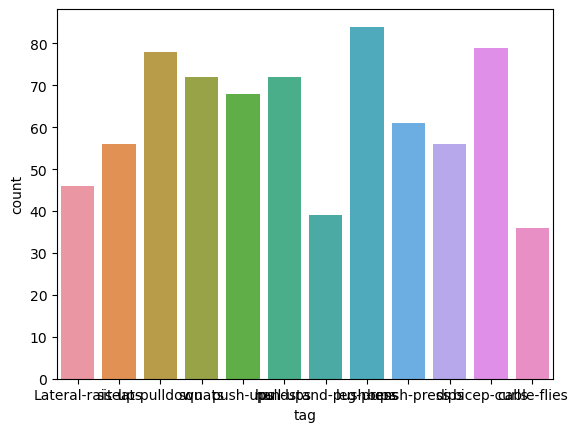

In [48]:
sns.countplot(x=train_data['tag'])


<Axes: xlabel='tag', ylabel='count'>

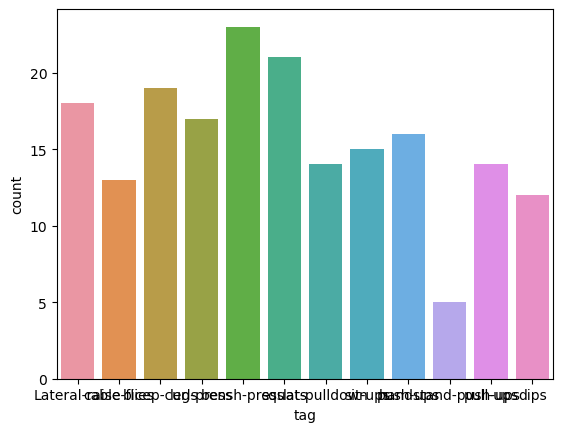

In [49]:
sns.countplot(x=test_data['tag'])

In [50]:
#!pip install git+https://github.com/tensorflow/docs

In [51]:
from tensorflow import keras

import numpy as np
import cv2
import os

# Data preparation

In [53]:
print(f"Total videos for training: {len( train_data)}")
print(f"Total videos for testing: {len(test_data)}")


train_data.sample(10)

Total videos for training: 747
Total videos for testing: 187


,tag,video_name
140,bicep-curls,C:/Users/aminb/Desktop/EID2/Image Mining/fitne...
764,push-ups,C:/Users/aminb/Desktop/EID2/Image Mining/fitne...
225,cable-flies,C:/Users/aminb/Desktop/EID2/Image Mining/fitne...
922,squats,C:/Users/aminb/Desktop/EID2/Image Mining/fitne...
391,lat-pulldown,C:/Users/aminb/Desktop/EID2/Image Mining/fitne...
302,handstand-push-ups,C:/Users/aminb/Desktop/EID2/Image Mining/fitne...
715,push-ups,C:/Users/aminb/Desktop/EID2/Image Mining/fitne...
189,cable-flies,C:/Users/aminb/Desktop/EID2/Image Mining/fitne...
571,leg-press,C:/Users/aminb/Desktop/EID2/Image Mining/fitne...
331,handstand-push-ups,C:/Users/aminb/Desktop/EID2/Image Mining/fitne...


# Preprocessing Data


In [54]:
IMG_SIZE = 224

def crop_center_square(frame):
    y, x = frame.shape[0:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y : start_y + min_dim, start_x : start_x + min_dim]


def load_video(path, max_frames=0, resize=(IMG_SIZE, IMG_SIZE)):
    cap = cv2.VideoCapture(path)
    frames = []
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = crop_center_square(frame)
            frame = cv2.resize(frame, resize)
            frame = frame[:, :, [2, 1, 0]]
            frames.append(frame)

            if len(frames) == max_frames:
                break
    finally:
        cap.release()
    return np.array(frames)

* Feature Extraction

In [55]:
def build_feature_extractor():
    feature_extractor = keras.applications.InceptionV3(
        weights="imagenet",
        include_top=False,
        pooling="avg",
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
    )
    preprocess_input = keras.applications.inception_v3.preprocess_input

    inputs = keras.Input((IMG_SIZE, IMG_SIZE, 3))
    preprocessed = preprocess_input(inputs)

    outputs = feature_extractor(preprocessed)
    return keras.Model(inputs, outputs, name="feature_extractor")


feature_extractor = build_feature_extractor()

* Label Encoding

In [56]:
label_processor = keras.layers.StringLookup(num_oov_indices=0, vocabulary=np.unique( train_data[ 'tag']))
print( label_processor.get_vocabulary())

labels = train_data[ 'tag'].values
labels = label_processor( labels[..., None]).numpy()
labels

['Lateral-raise', 'bensh-press', 'bicep-curls', 'cable-flies', 'dips', 'handstand-push-ups', 'lat-pulldown', 'leg-press', 'pull-ups', 'push-ups', 'sit-ups', 'squats']


array([[ 0],
       [10],
       [ 6],
       [11],
       [ 9],
       [ 8],
       [ 5],
       [ 7],
       [ 9],
       [ 0],
       [11],
       [ 9],
       [ 0],
       [ 0],
       [ 1],
       [ 5],
       [10],
       [ 7],
       [ 4],
       [11],
       [ 6],
       [ 2],
       [ 2],
       [ 1],
       [ 7],
       [ 7],
       [ 1],
       [ 6],
       [ 0],
       [ 7],
       [ 8],
       [ 2],
       [ 1],
       [11],
       [11],
       [ 6],
       [10],
       [ 9],
       [ 6],
       [ 2],
       [11],
       [ 7],
       [11],
       [ 2],
       [10],
       [ 8],
       [ 8],
       [ 6],
       [10],
       [ 1],
       [ 6],
       [ 8],
       [ 8],
       [ 4],
       [ 7],
       [ 3],
       [ 2],
       [ 1],
       [ 9],
       [ 8],
       [ 2],
       [ 2],
       [ 4],
       [11],
       [ 7],
       [ 2],
       [ 9],
       [ 1],
       [ 1],
       [ 8],
       [ 2],
       [ 8],
       [11],
       [ 8],
       [ 9],
       [ 8],
       [ 7],

In [57]:
IMG_SIZE = 224
BATCH_SIZE = 64
EPOCHS = 100

MAX_SEQ_LENGTH = 20
NUM_FEATURES = 2048

In [58]:
def prepare_all_videos(df, root_dir):
    num_samples = len(df)
    video_paths = df["video_name"].values.tolist()
    
    ##take all classlabels from train_df column named 'tag' and store in labels
    labels = df["tag"].values
    
    #convert classlabels to label encoding
    labels = label_processor(labels[..., None]).numpy()

    # `frame_masks` and `frame_features` are what we will feed to our sequence model.
    # `frame_masks` will contain a bunch of booleans denoting if a timestep is
    # masked with padding or not.
    frame_masks = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH), dtype="bool") # 145,20
    frame_features = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32") #145,20,2048

    # For each video.
    for idx, path in enumerate(video_paths):
        # Gather all its frames and add a batch dimension.
        frames = load_video(os.path.join(root_dir, path))
        frames = frames[None, ...]

        # Initialize placeholders to store the masks and features of the current video.
        temp_frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
        temp_frame_features = np.zeros(
            shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
        )

        # Extract features from the frames of the current video.
        for i, batch in enumerate(frames):
            video_length = batch.shape[0]
            length = min(MAX_SEQ_LENGTH, video_length)
            for j in range(length):
                temp_frame_features[i, j, :] = feature_extractor.predict(
                    batch[None, j, :]
                )
            temp_frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

        frame_features[idx,] = temp_frame_features.squeeze()
        frame_masks[idx,] = temp_frame_mask.squeeze()

    return (frame_features, frame_masks), labels


X_train, y_train = prepare_all_videos( train_data, path)
X_test, y_test = prepare_all_videos( test_data, path)



1/1 [==============================] - 0s 117ms/step


# Saving Preprocessed Data

In [62]:
np.save('npys/train_features.npy', X_train[0])
np.save('npys/train_masks.npy', X_train[1])
np.save('npys/train_labels.npy', y_train)

np.save('npys/test_features.npy', X_test[0])
np.save('npys/test_masks.npy', X_test[1])
np.save('npys/test_labels.npy', y_test)

In [66]:
print(f"Frame features in train set: {X_train[0].shape}")
print(f"Frame masks in train set: {X_train[1].shape}")



print(f"train_labels in train set: { y_train.shape}")

print(f"test_labels in train set: { y_test.shape}")

# MAX_SEQ_LENGTH = 20, NUM_FEATURES = 2048. We have defined this above under hyper parameters

Frame features in train set: (747, 20, 2048)
Frame masks in train set: (747, 20)
train_labels in train set: (747, 1)
test_labels in train set: (187, 1)
